
# Определение цены авиаперелета.

**Напылов Евгений М22-ИВТ-1**



In [1]:
import numpy as np
import matplotlib.pyplot as plt            
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm.notebook import trange, tqdm
from PIL import Image

## Data

https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset

Есть куча данных о авиаперелетах и их стоимость. Нужно построить линейную регрессию, которая будет определять стоимость полета.

In [2]:
data = pd.read_excel('../data/flight_price_train.xlsx')

In [3]:
list(data)

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

- 'Airline' - авиакомпания
- 'Date_of_Journey' - дата
- 'Source' - откуда
- 'Destination' - куда
- 'Route' - маршрут по аэропортам
- 'Dep_Time' - время отправления
- 'Arrival_Time' - время прибытия
- 'Duration' - продолжительность полета
- 'Total_Stops' - число остановок
- 'Additional_Info' - доп инфа
- 'Price' - цена полета (таргет)

**Пропущенные и повторы**

In [4]:
data.isna().sum().sum(), data.duplicated().sum().sum()

(2, 220)

In [5]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [6]:
data.isna().sum().sum(), data.duplicated().sum().sum()

(0, 0)

In [7]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Убираем день из времени прибытия

In [8]:
data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x: x.split(' ')[0])

In [9]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Конвертируем время полета в минуты

In [10]:
data['Duration'] = data['Duration'].apply(lambda x: x.replace('h', '').replace('m', '').strip())
data['Duration'] = data['Duration'].apply(lambda x: 60*int(x) if len(x.split(' ')) < 2 else int(x.split(' ')[0])*60 + int(x.split(' ')[1]))

In [11]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648


Конвертируем дату отправления в приблизительный день года

In [12]:
data['Date_of_Journey'] = data['Date_of_Journey'].apply(lambda x: x.split('/'))
data['Date_of_Journey'] = data['Date_of_Journey'].apply(lambda x: int(x[0]) + int(x[1])*30)

In [13]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,114,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,non-stop,No info,3897
1,Air India,151,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,189,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2 stops,No info,13882
3,IndiGo,162,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,91,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,129,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107
10679,Air India,147,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145
10680,Jet Airways,147,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229
10681,Vistara,91,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648


Число остановок в нормальное число

In [14]:
data['Total_Stops'] = data['Total_Stops'].apply(lambda x: x.split(' '))
data['Total_Stops'] = data['Total_Stops'].apply(lambda x: 0 if len(x) < 2 else int(x[0]))

In [15]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,114,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,0,No info,3897
1,Air India,151,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,189,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2,No info,13882
3,IndiGo,162,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,91,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,129,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,0,No info,4107
10679,Air India,147,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,0,No info,4145
10680,Jet Airways,147,Banglore,Delhi,BLR → DEL,08:20,11:20,180,0,No info,7229
10681,Vistara,91,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,0,No info,12648


Время отправления и прибытия в минуты

In [16]:
data['Dep_Time'] = data['Dep_Time'].apply(lambda x: x.split(':'))
data['Dep_Time'] = data['Dep_Time'].apply(lambda x: int(x[0])*60 + int(x[1]))

data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x: x.split(':'))
data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x: int(x[0])*60 + int(x[1]))

In [17]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,114,Banglore,New Delhi,BLR → DEL,1340,70,170,0,No info,3897
1,Air India,151,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,795,445,2,No info,7662
2,Jet Airways,189,Delhi,Cochin,DEL → LKO → BOM → COK,565,265,1140,2,No info,13882
3,IndiGo,162,Kolkata,Banglore,CCU → NAG → BLR,1085,1410,325,1,No info,6218
4,IndiGo,91,Banglore,New Delhi,BLR → NAG → DEL,1010,1295,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,129,Kolkata,Banglore,CCU → BLR,1195,1345,150,0,No info,4107
10679,Air India,147,Kolkata,Banglore,CCU → BLR,1245,1400,155,0,No info,4145
10680,Jet Airways,147,Banglore,Delhi,BLR → DEL,500,680,180,0,No info,7229
10681,Vistara,91,Banglore,New Delhi,BLR → DEL,690,850,160,0,No info,12648


**Price hist**

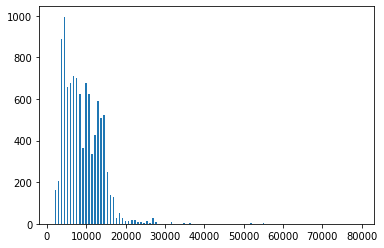

In [18]:
plt.hist(data.Price, bins=100, rwidth=0.5)
pass

In [19]:
data.Price.max()

79512

Есть выбросы, их лучше убрать.

In [20]:
data.drop(data[data.Price > 18000].index, inplace=True)

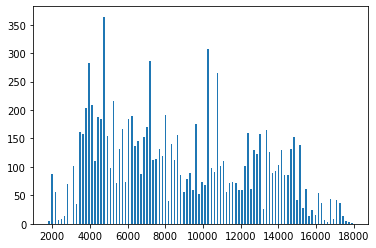

In [21]:
plt.hist(data.Price, bins=100, rwidth=0.5)
pass

In [22]:
data.Price.max()

17996

In [23]:
np.random.seed(123)
random_set = np.random.choice(np.arange(data.shape[0]), size=500)

**Price(Airline)**

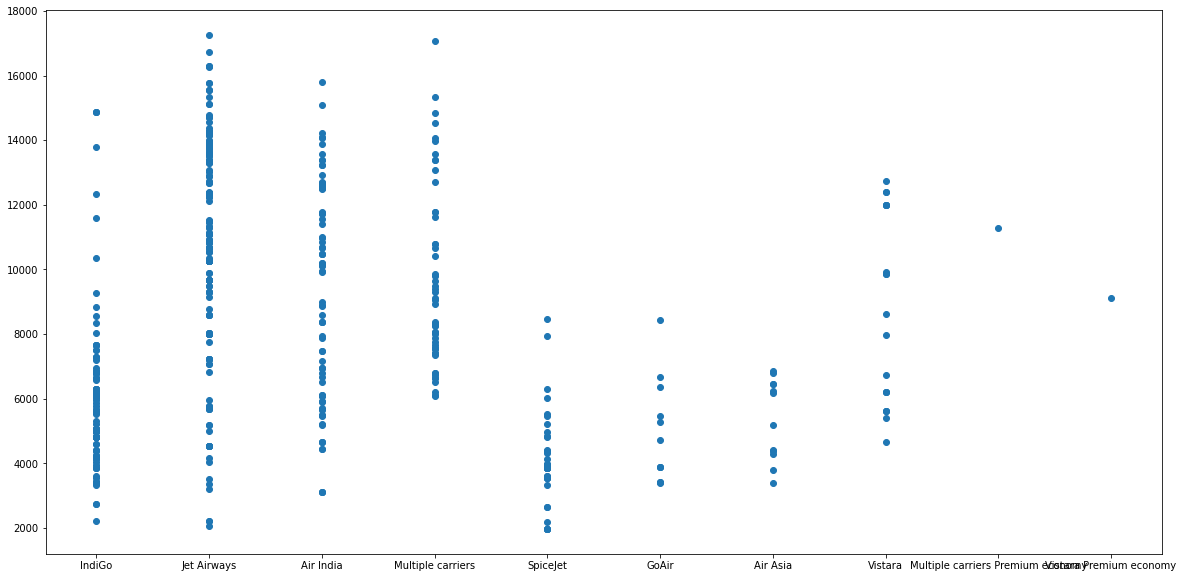

In [24]:
plt.figure(figsize=(20, 10))
plt.scatter(data.iloc[random_set]['Airline'], data.iloc[random_set]['Price'])
pass

**Price(Date_of_Journey)**

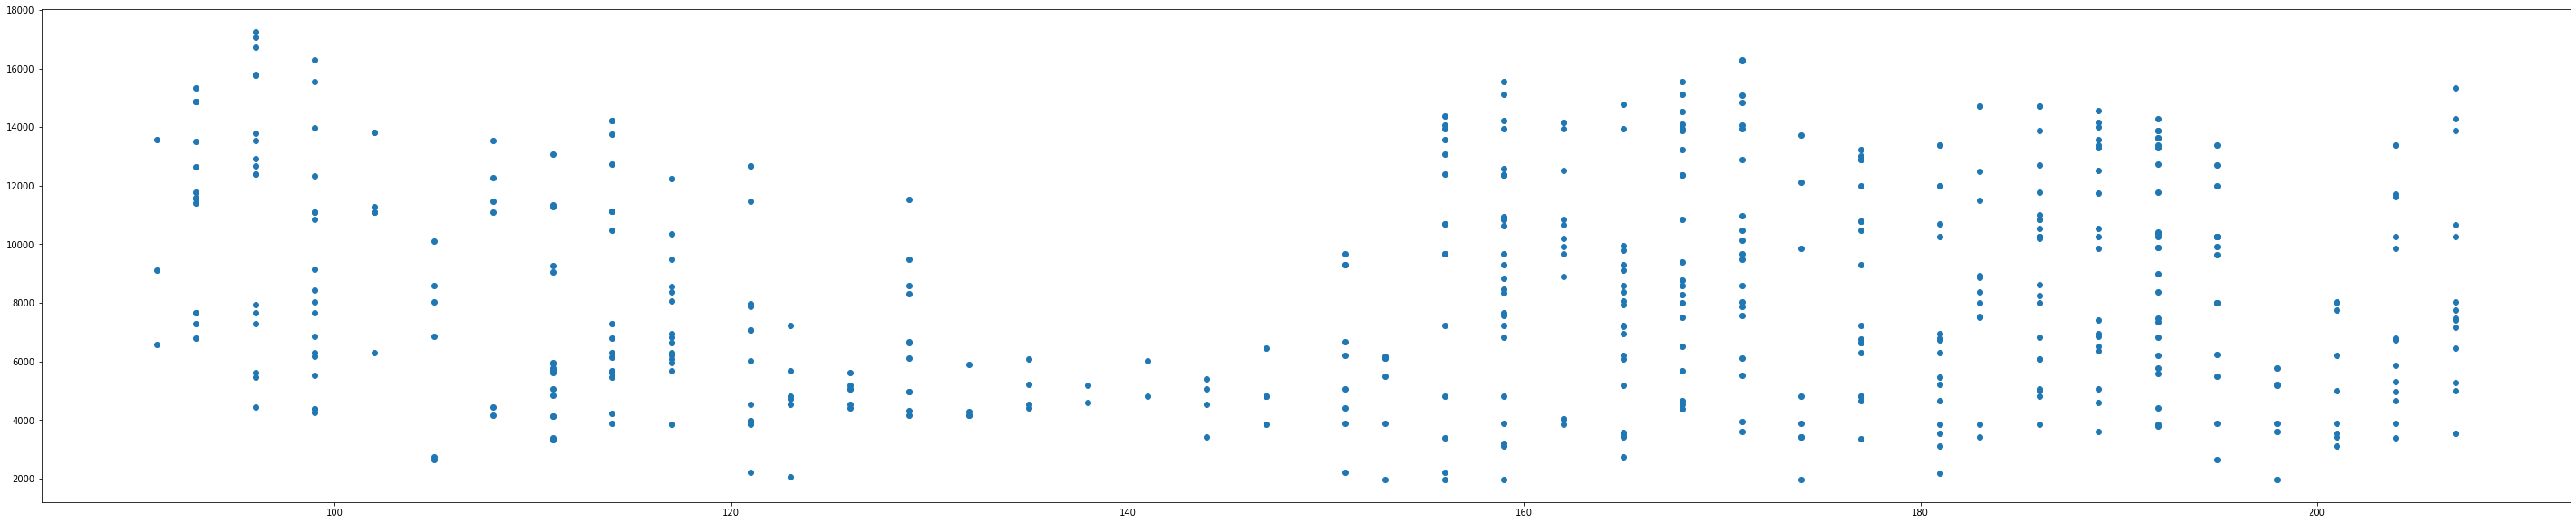

In [25]:
plt.figure(figsize=(50, 10))
plt.scatter(data.iloc[random_set]['Date_of_Journey'], data.iloc[random_set]['Price'])
pass

**Price(Source)**

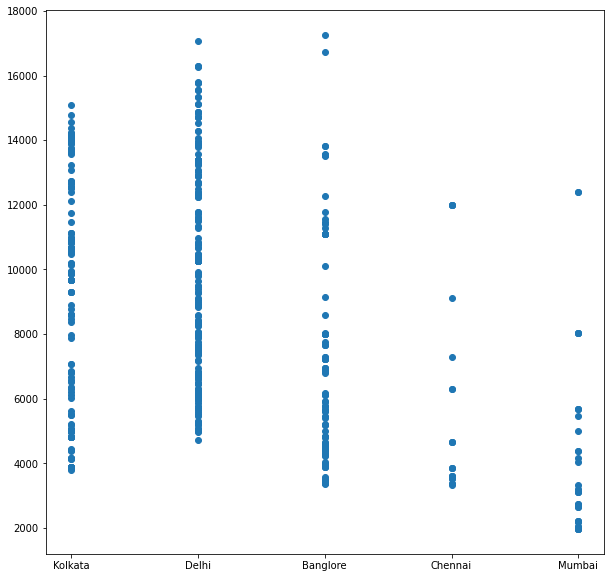

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[random_set]['Source'], data.iloc[random_set]['Price'])
pass

**Price(Destination)**

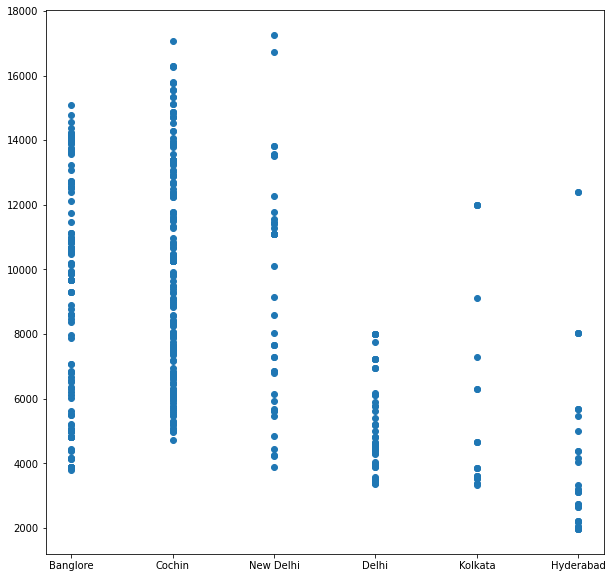

In [27]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[random_set]['Destination'], data.iloc[random_set]['Price'])
pass

**Price(Route)**

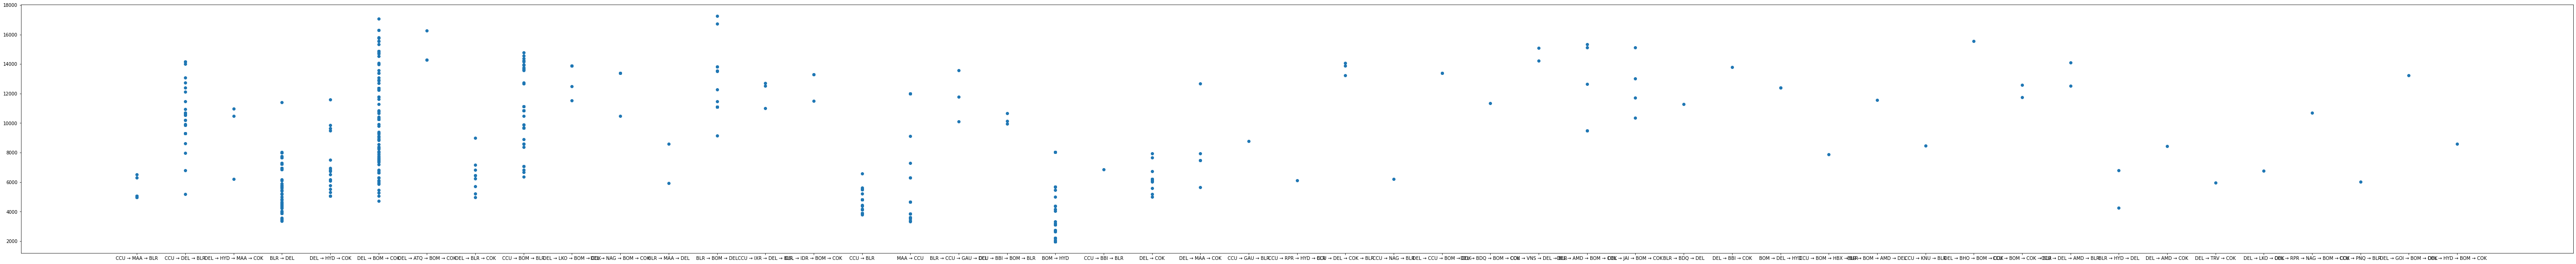

In [28]:
plt.figure(figsize=(100, 10))
plt.scatter(data.iloc[random_set]['Route'], data.iloc[random_set]['Price'])
pass

**Price(Dep_Time)**

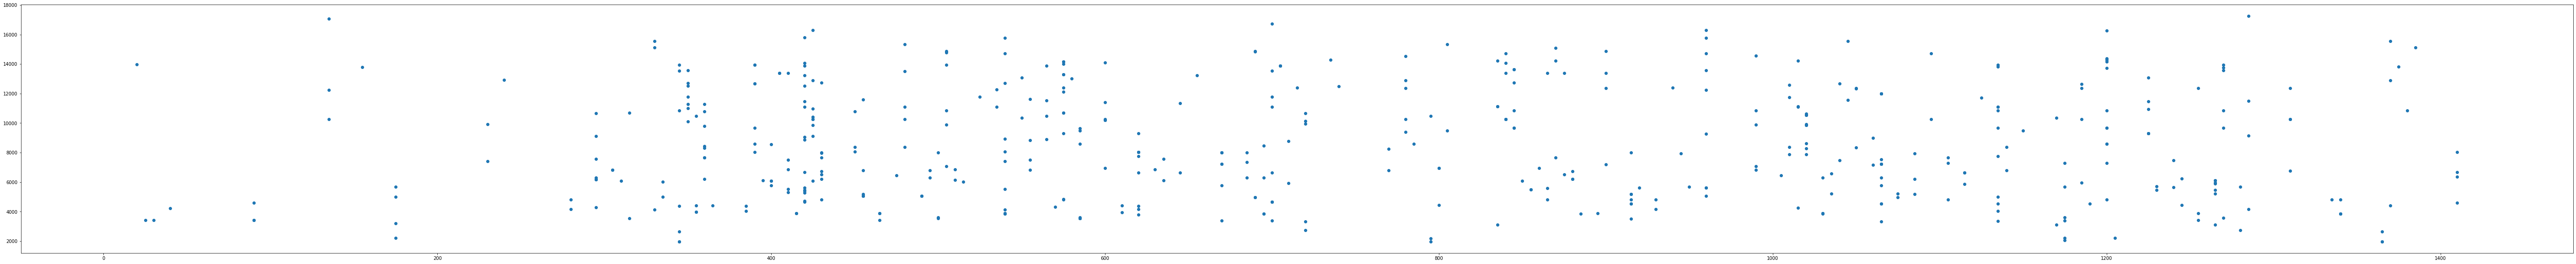

In [29]:
plt.figure(figsize=(100, 10))
plt.scatter(data.iloc[random_set]['Dep_Time'], data.iloc[random_set]['Price'])
pass

**Price(Arrival_Time)**

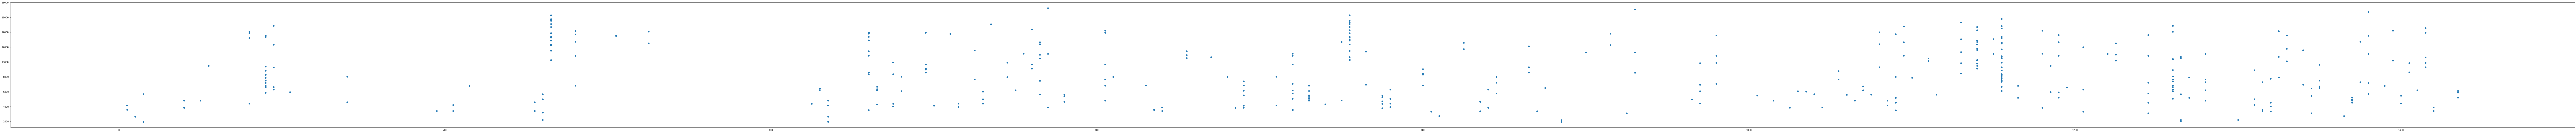

In [30]:
plt.figure(figsize=(200, 10))
plt.scatter(data.iloc[random_set]['Arrival_Time'], data.iloc[random_set]['Price'])
pass

**Price(Duration)**

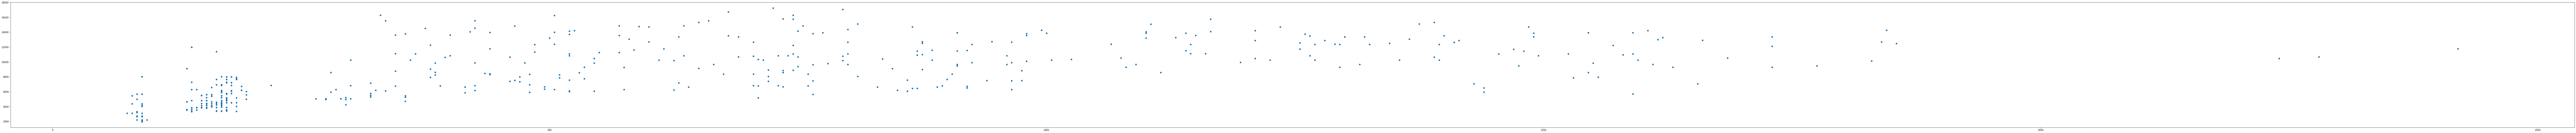

In [31]:
plt.figure(figsize=(200, 10))
plt.scatter(data.iloc[random_set]['Duration'], data.iloc[random_set]['Price'])
pass

**Price(Total_Stops)**

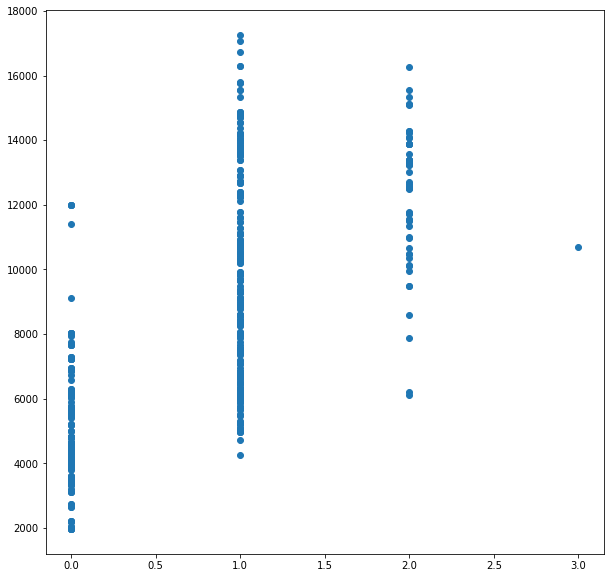

In [32]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[random_set]['Total_Stops'], data.iloc[random_set]['Price'])
pass

**Price(Additional_Info)**

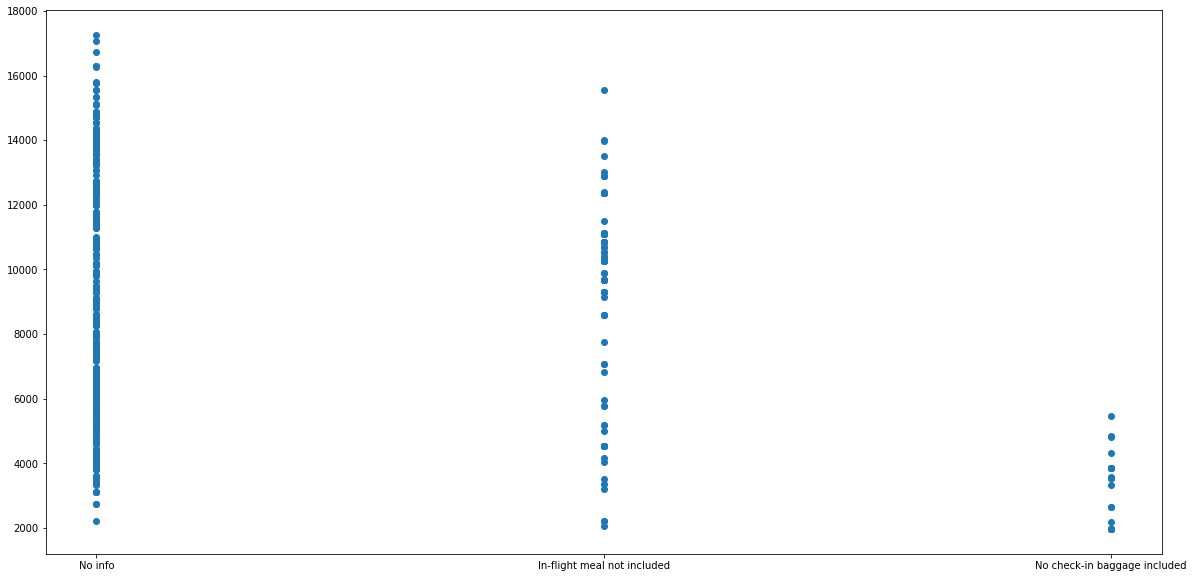

In [33]:
plt.figure(figsize=(20, 10))
plt.scatter(data.iloc[random_set]['Additional_Info'], data.iloc[random_set]['Price'])
pass

**Убираем лишние признаки**   
Arrival_Time, Route, Source, Destination  слабо влияют на стоимость, их лучше убрать, чтобы понизить размерность.    
UPD. Решил оставить, они все-таки дают небольшой прирост

In [34]:
# data = data.drop(['Arrival_Time'], axis=1)
# data = data.drop(['Route'], axis=1)

In [35]:
# data = data.drop(['Source'], axis=1)
# data = data.drop(['Destination'], axis=1)

**Текстовые данные**

OneHot Source

In [36]:
Source_unique = data['Source'].unique()
Source = pd.get_dummies(data['Source'], drop_first=True)
data = pd.concat([data, Source], axis=1).drop('Source', axis=1)
rename_dict = dict()
for s in Source_unique:
    rename_dict[s] = f'Source_{s}'
data = data.rename(columns=rename_dict)
data

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,114,New Delhi,BLR → DEL,1340,70,170,0,No info,3897,0,0,0,0
1,Air India,151,Banglore,CCU → IXR → BBI → BLR,350,795,445,2,No info,7662,0,0,1,0
2,Jet Airways,189,Cochin,DEL → LKO → BOM → COK,565,265,1140,2,No info,13882,0,1,0,0
3,IndiGo,162,Banglore,CCU → NAG → BLR,1085,1410,325,1,No info,6218,0,0,1,0
4,IndiGo,91,New Delhi,BLR → NAG → DEL,1010,1295,285,1,No info,13302,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,129,Banglore,CCU → BLR,1195,1345,150,0,No info,4107,0,0,1,0
10679,Air India,147,Banglore,CCU → BLR,1245,1400,155,0,No info,4145,0,0,1,0
10680,Jet Airways,147,Delhi,BLR → DEL,500,680,180,0,No info,7229,0,0,0,0
10681,Vistara,91,New Delhi,BLR → DEL,690,850,160,0,No info,12648,0,0,0,0


OneHot Destination

In [37]:
Destination_unique = data['Destination'].unique()
Destination = pd.get_dummies(data['Destination'], drop_first=True)
data = pd.concat([data, Destination], axis=1).drop('Destination', axis=1)
rename_dict = dict()
for d in Destination_unique:
    rename_dict[s] = f'Destination_{d}'
data = data.rename(columns=rename_dict)
data

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,114,BLR → DEL,1340,70,170,0,No info,3897,0,0,0,0,0,0,0,0,1
1,Air India,151,CCU → IXR → BBI → BLR,350,795,445,2,No info,7662,0,0,1,0,0,0,0,0,0
2,Jet Airways,189,DEL → LKO → BOM → COK,565,265,1140,2,No info,13882,0,1,0,0,1,0,0,0,0
3,IndiGo,162,CCU → NAG → BLR,1085,1410,325,1,No info,6218,0,0,1,0,0,0,0,0,0
4,IndiGo,91,BLR → NAG → DEL,1010,1295,285,1,No info,13302,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,129,CCU → BLR,1195,1345,150,0,No info,4107,0,0,1,0,0,0,0,0,0
10679,Air India,147,CCU → BLR,1245,1400,155,0,No info,4145,0,0,1,0,0,0,0,0,0
10680,Jet Airways,147,BLR → DEL,500,680,180,0,No info,7229,0,0,0,0,0,1,0,0,0
10681,Vistara,91,BLR → DEL,690,850,160,0,No info,12648,0,0,0,0,0,0,0,0,1


OneHot Airline

In [38]:
Airline = pd.get_dummies(data['Airline'], drop_first=True)
data = pd.concat([data, Airline], axis=1).drop('Airline', axis=1)

In [39]:
data

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Chennai,Source_Delhi,...,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,114,BLR → DEL,1340,70,170,0,No info,3897,0,0,...,0,0,1,0,0,0,0,0,0,0
1,151,CCU → IXR → BBI → BLR,350,795,445,2,No info,7662,0,0,...,1,0,0,0,0,0,0,0,0,0
2,189,DEL → LKO → BOM → COK,565,265,1140,2,No info,13882,0,1,...,0,0,0,1,0,0,0,0,0,0
3,162,CCU → NAG → BLR,1085,1410,325,1,No info,6218,0,0,...,0,0,1,0,0,0,0,0,0,0
4,91,BLR → NAG → DEL,1010,1295,285,1,No info,13302,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,129,CCU → BLR,1195,1345,150,0,No info,4107,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,147,CCU → BLR,1245,1400,155,0,No info,4145,0,0,...,1,0,0,0,0,0,0,0,0,0
10680,147,BLR → DEL,500,680,180,0,No info,7229,0,0,...,0,0,0,1,0,0,0,0,0,0
10681,91,BLR → DEL,690,850,160,0,No info,12648,0,0,...,0,0,0,0,0,0,0,0,1,0


OneHot Route   
! Это привело к сильному переобучению
! Придется отказаться от OneHot

In [40]:
# data['Route'] = data['Route'].apply(lambda x: x.split(' → '))
# mlb = preprocessing.MultiLabelBinarizer(sparse_output=True)
# data = data.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(data.pop('Route')), index=data.index, columns=mlb.classes_))
# data

In [41]:
# del this
# lalalalalla

OneHot Additional_Info

In [42]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'No Info', '1 Long layover',
       'Change airports', 'Red-eye flight'], dtype=object)

In [43]:
Additional_Info = pd.get_dummies(data['Additional_Info'], drop_first=True)
data = pd.concat([data, Additional_Info], axis=1).drop('Additional_Info', axis=1)

In [44]:
# убираем Additional_Info - No Info, т.к. логично, что это будет 0-0-...-0 по остальным в onehot-е
data = data.drop(['No info'], axis=1)
data = data.drop(['No Info'], axis=1)

In [45]:
data

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Source_Chennai,Source_Delhi,Source_Kolkata,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Change airports,In-flight meal not included,No check-in baggage included,Red-eye flight
0,114,BLR → DEL,1340,70,170,0,3897,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,151,CCU → IXR → BBI → BLR,350,795,445,2,7662,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,189,DEL → LKO → BOM → COK,565,265,1140,2,13882,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,162,CCU → NAG → BLR,1085,1410,325,1,6218,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,91,BLR → NAG → DEL,1010,1295,285,1,13302,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,129,CCU → BLR,1195,1345,150,0,4107,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10679,147,CCU → BLR,1245,1400,155,0,4145,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10680,147,BLR → DEL,500,680,180,0,7229,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10681,91,BLR → DEL,690,850,160,0,12648,0,0,0,...,0,0,0,0,1,0,0,0,0,0


LabelEncoder other

In [46]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
categorical_columns

['Route']

In [47]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

In [48]:
if len(categorical_columns) > 0:
    data_describe = data.describe(include = [object])
    number = preprocessing.LabelEncoder()

    for cc in categorical_columns:
        data[cc] = number.fit_transform(data[cc])

In [49]:
data

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Source_Chennai,Source_Delhi,Source_Kolkata,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Change airports,In-flight meal not included,No check-in baggage included,Red-eye flight
0,114,18,1340,70,170,0,3897,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,151,78,350,795,445,2,7662,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,189,110,565,265,1140,2,13882,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,162,85,1085,1410,325,1,6218,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,91,29,1010,1295,285,1,13302,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,129,58,1195,1345,150,0,4107,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10679,147,58,1245,1400,155,0,4145,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10680,147,18,500,680,180,0,7229,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10681,91,18,690,850,160,0,12648,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Нормализация**

In [50]:
price = data['Price']
#price = (price-price.min())/(price.max()-price.min())
to_norm = data.drop('Price', axis=1)

In [51]:
normalized_data=(to_norm-to_norm.min())/(to_norm.max()-to_norm.min())

In [52]:
normalized_data

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Change airports,In-flight meal not included,No check-in baggage included,Red-eye flight
0,0.198276,0.151261,0.932862,0.045455,0.038153,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.517241,0.655462,0.233216,0.552448,0.148594,0.50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.844828,0.924370,0.385159,0.181818,0.427711,0.50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.612069,0.714286,0.752650,0.982517,0.100402,0.25,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.243697,0.699647,0.902098,0.084337,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.327586,0.487395,0.830389,0.937063,0.030120,0.00,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10679,0.482759,0.487395,0.865724,0.975524,0.032129,0.00,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10680,0.482759,0.151261,0.339223,0.472028,0.042169,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10681,0.000000,0.151261,0.473498,0.590909,0.034137,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
data = pd.concat((normalized_data, price), axis = 1)

In [54]:
data['Price'].mean()

8677.943080684596

In [55]:
data

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Change airports,In-flight meal not included,No check-in baggage included,Red-eye flight,Price
0,0.198276,0.151261,0.932862,0.045455,0.038153,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3897
1,0.517241,0.655462,0.233216,0.552448,0.148594,0.50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7662
2,0.844828,0.924370,0.385159,0.181818,0.427711,0.50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13882
3,0.612069,0.714286,0.752650,0.982517,0.100402,0.25,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6218
4,0.000000,0.243697,0.699647,0.902098,0.084337,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.327586,0.487395,0.830389,0.937063,0.030120,0.00,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4107
10679,0.482759,0.487395,0.865724,0.975524,0.032129,0.00,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4145
10680,0.482759,0.151261,0.339223,0.472028,0.042169,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7229
10681,0.000000,0.151261,0.473498,0.590909,0.034137,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12648


**Корреляции**

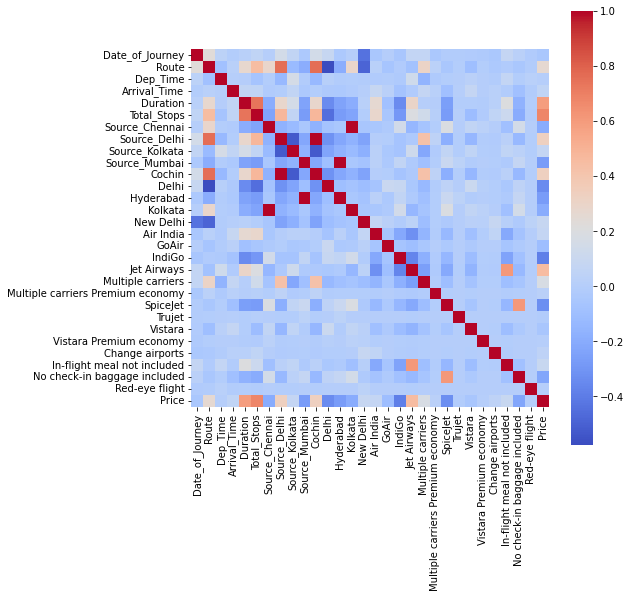

In [56]:
corr_matrix=data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

## Train & test split

In [57]:
X = data.drop('Price', axis = 1).to_numpy().astype(np.float32)
y = np.array(data['Price'], dtype=np.float32)

In [58]:
X.shape, y.shape

((10225, 29), (10225,))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
y_train.shape, y_test.shape

((7157,), (3068,))

In [61]:
X_train.shape, X_test.shape

((7157, 29), (3068, 29))

## Linear regression

In [62]:
model = LinearRegression().fit(X_train, y_train)

In [63]:
def regression_report(X_train, y_train, X_test, y_test, pred_train, pred_test):
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    mae_train = mean_absolute_error(y_train, pred_train)
    mae_test = mean_absolute_error(y_test, pred_test)
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)
    res = f"""
    R2 train:\t{r2_train}
    R2 test:\t{r2_test}
    
    MAE train:\t{mae_train}
    MAE test:\t{mae_test}
    
    MSE train\t{mse_train}
    MSE test:\t{mse_test}
    """
    return res

**Metrics**

In [64]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

In [65]:
print(regression_report(X_train, y_train, X_test, y_test, pred_train, pred_test))


    R2 train:	0.7215851937277724
    R2 test:	0.7082920323244801
    
    MAE train:	1553.8804931640625
    MAE test:	1555.5675048828125
    
    MSE train	4203709.5
    MSE test:	4323156.5
    


R2 -> 1   
MAE, MSE -> 0

Сойдет

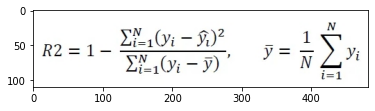

In [66]:
im = Image.open('r2.jpg')
plt.imshow(im)
pass

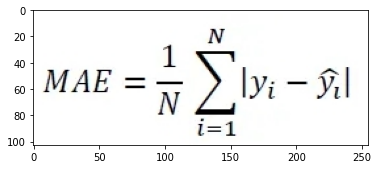

In [67]:
im = Image.open('mae.jpg')
plt.imshow(im)
pass

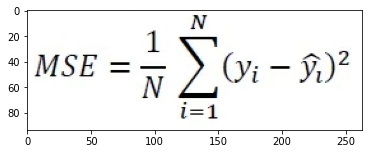

In [68]:
im = Image.open('mse.jpg')
plt.imshow(im)
pass

**PredictTest(TrueTest)**

Тут по оси х расположены настоящие цены, а по оси у - предсказанные.   
В идеале должна получиться зеленая прямая - все цены точно определены. Но, конечно, получаем кучу отклонений.

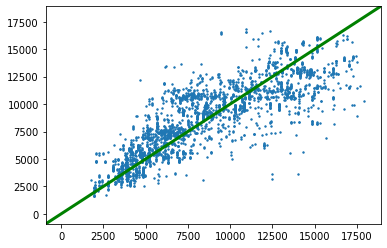

In [69]:
plt.scatter(y_test, pred_test, s=2)
plt.axline((0, 0), (18000, 18000), linewidth=3, color='g')
plt.show()

**PredictTrain(TrueTrain)**

Тут по оси х расположены настоящие цены, а по оси у - предсказанные.   
В идеале должна получиться зеленая прямая - все цены точно определены. Но, конечно, получаем кучу отклонений.

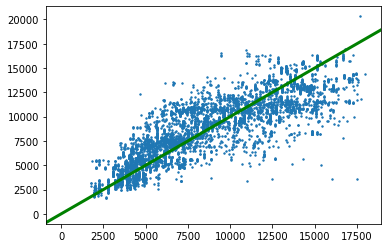

In [70]:
plt.scatter(y_train, pred_train, s=2)
plt.axline((0, 0), (18000, 18000), linewidth=3, color='g')
plt.show()